<a href="https://colab.research.google.com/github/harini-0531/Storage-course-/blob/main/Output(Google_Colab_Implementation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Load the datasets

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [2]:
house_data=pd.read_csv('data.csv')
house_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
house_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [4]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [5]:
house_data.shape

(4600, 18)

In [6]:
house_data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

2.Data Description

i) Handling Missing Data

In [7]:
house_data.isna().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


ii) Duplicate records

In [8]:
house_data.duplicated().sum()

np.int64(0)

iii)Treat and Detect Outliers

In [9]:
def remove_outliers(df,column) :
    Q1 = df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-IQR*1.5
    upper = Q3+IQR*1.5
    return df[(df[column]>=lower) & (df[column]<=upper)]

iv)Convert datatypes and Ensure Consistency

In [10]:
house_data.dtypes

,0
date,object
price,float64
bedrooms,float64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64
condition,int64


v)Encode Categorical Values

In [11]:
y = house_data['price']
X = house_data.drop('price', axis=1)
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_train_cat = pd.DataFrame(encoder.fit_transform(X_train[categorical_cols]),
                           columns=encoder.get_feature_names_out(categorical_cols),
                           index=X_train.index)
X_test_cat = pd.DataFrame(encoder.transform(X_test[categorical_cols]),
                          columns=encoder.get_feature_names_out(categorical_cols),index=X_test.index)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


vi)Normalize or Standardize features

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train.select_dtypes(exclude=['object']))
x_test = scaler.transform(X_test.select_dtypes(exclude=['object']))

3.Exploratory Data Analysis(EDA)

a) Univariate Analysis

i) Histogram

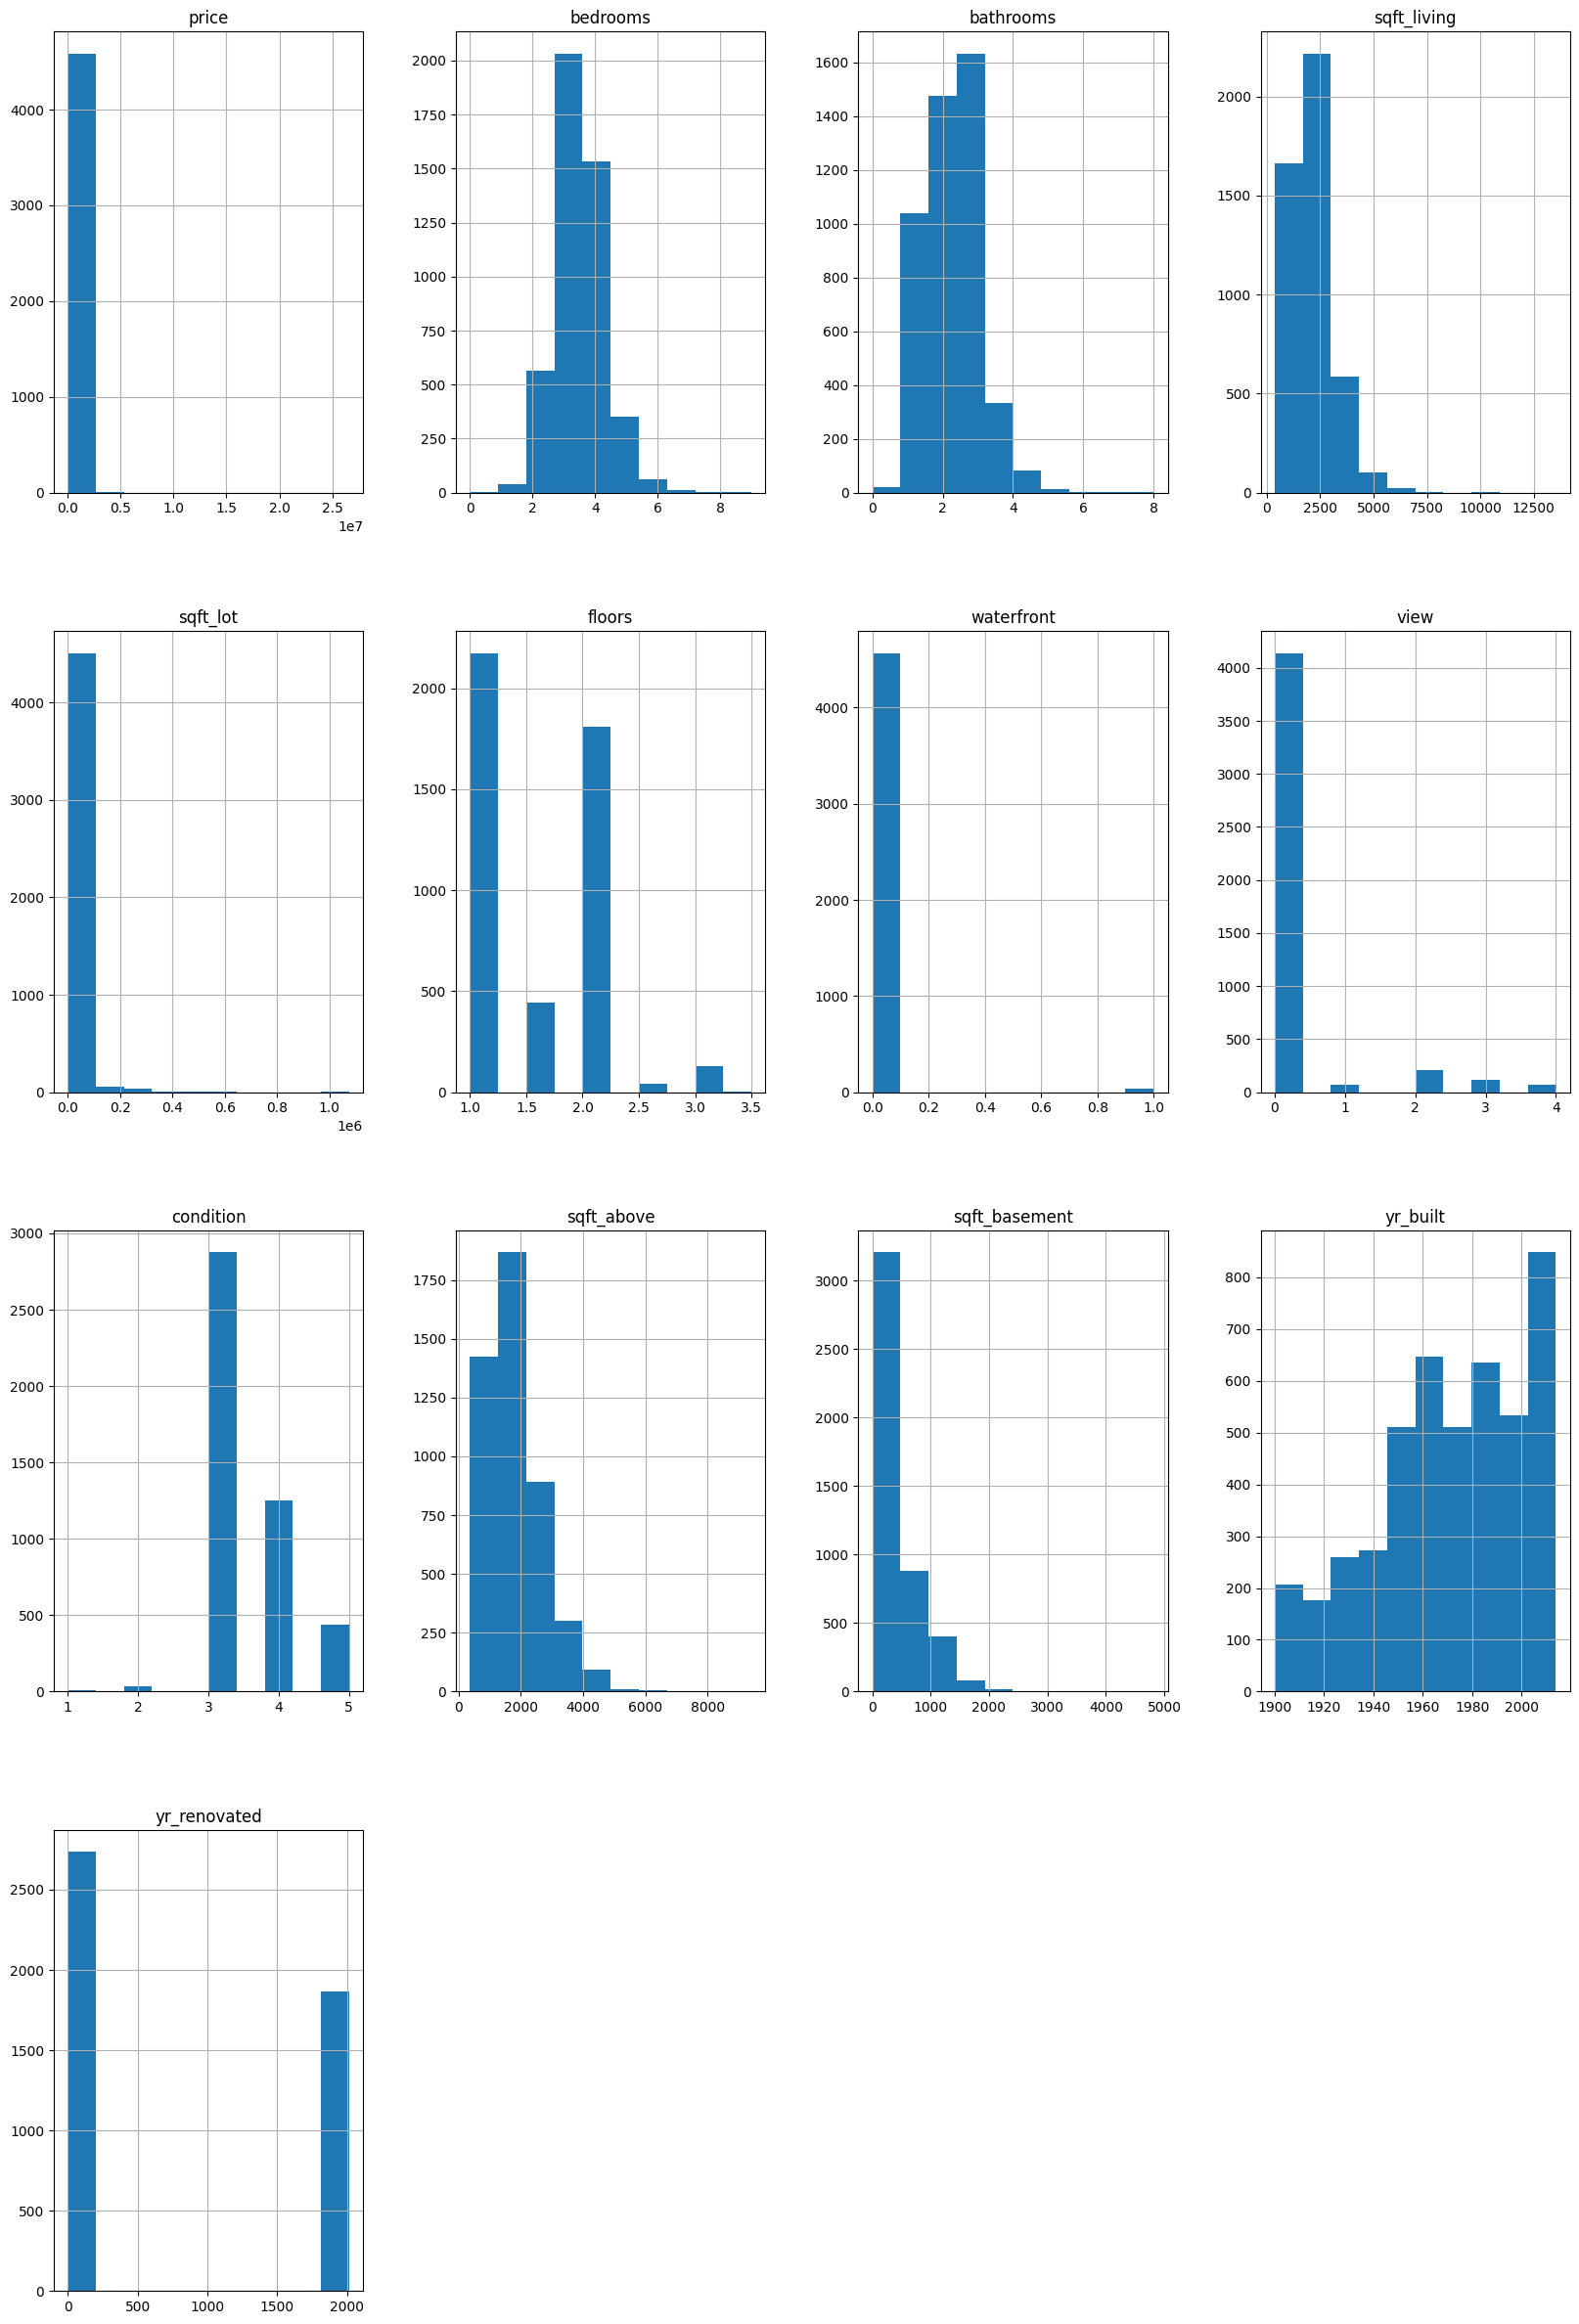

In [13]:
house_data.hist(figsize=(20,30))
plt.show()

ii) Barplot

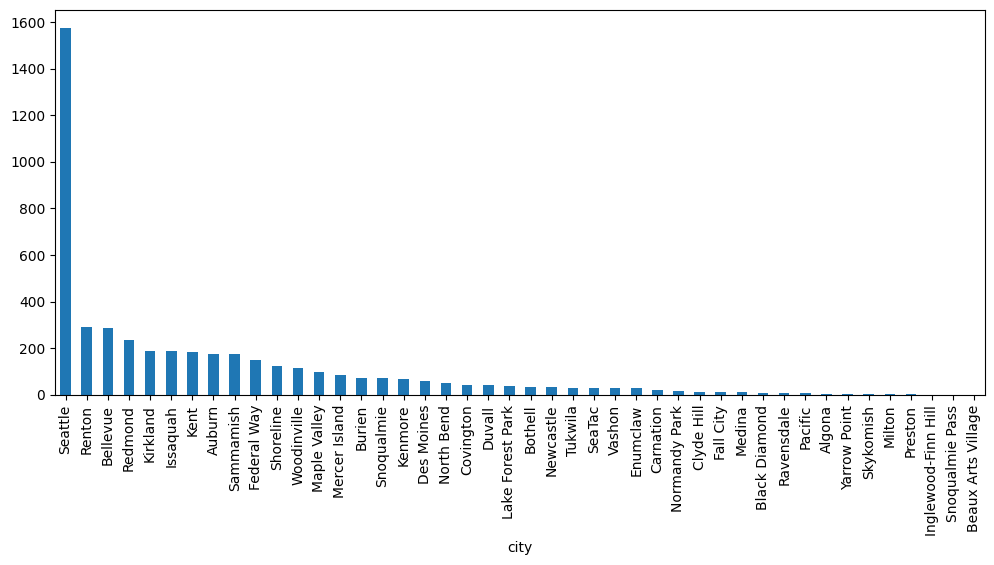

In [14]:
house_data.city.value_counts().plot(kind='bar', figsize=(12,5))
plt.show()

b) Bivariate/Multivariate Analysis

i) Correlation Matrix

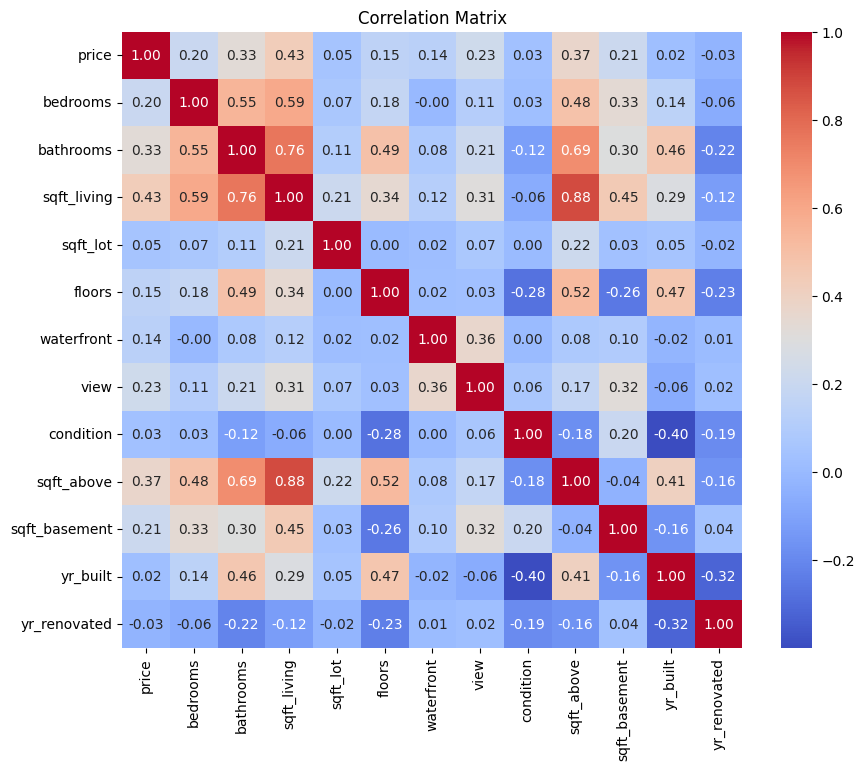

In [15]:
numeric_columns = house_data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

ii) Pairplot

<Figure size 2500x500 with 0 Axes>

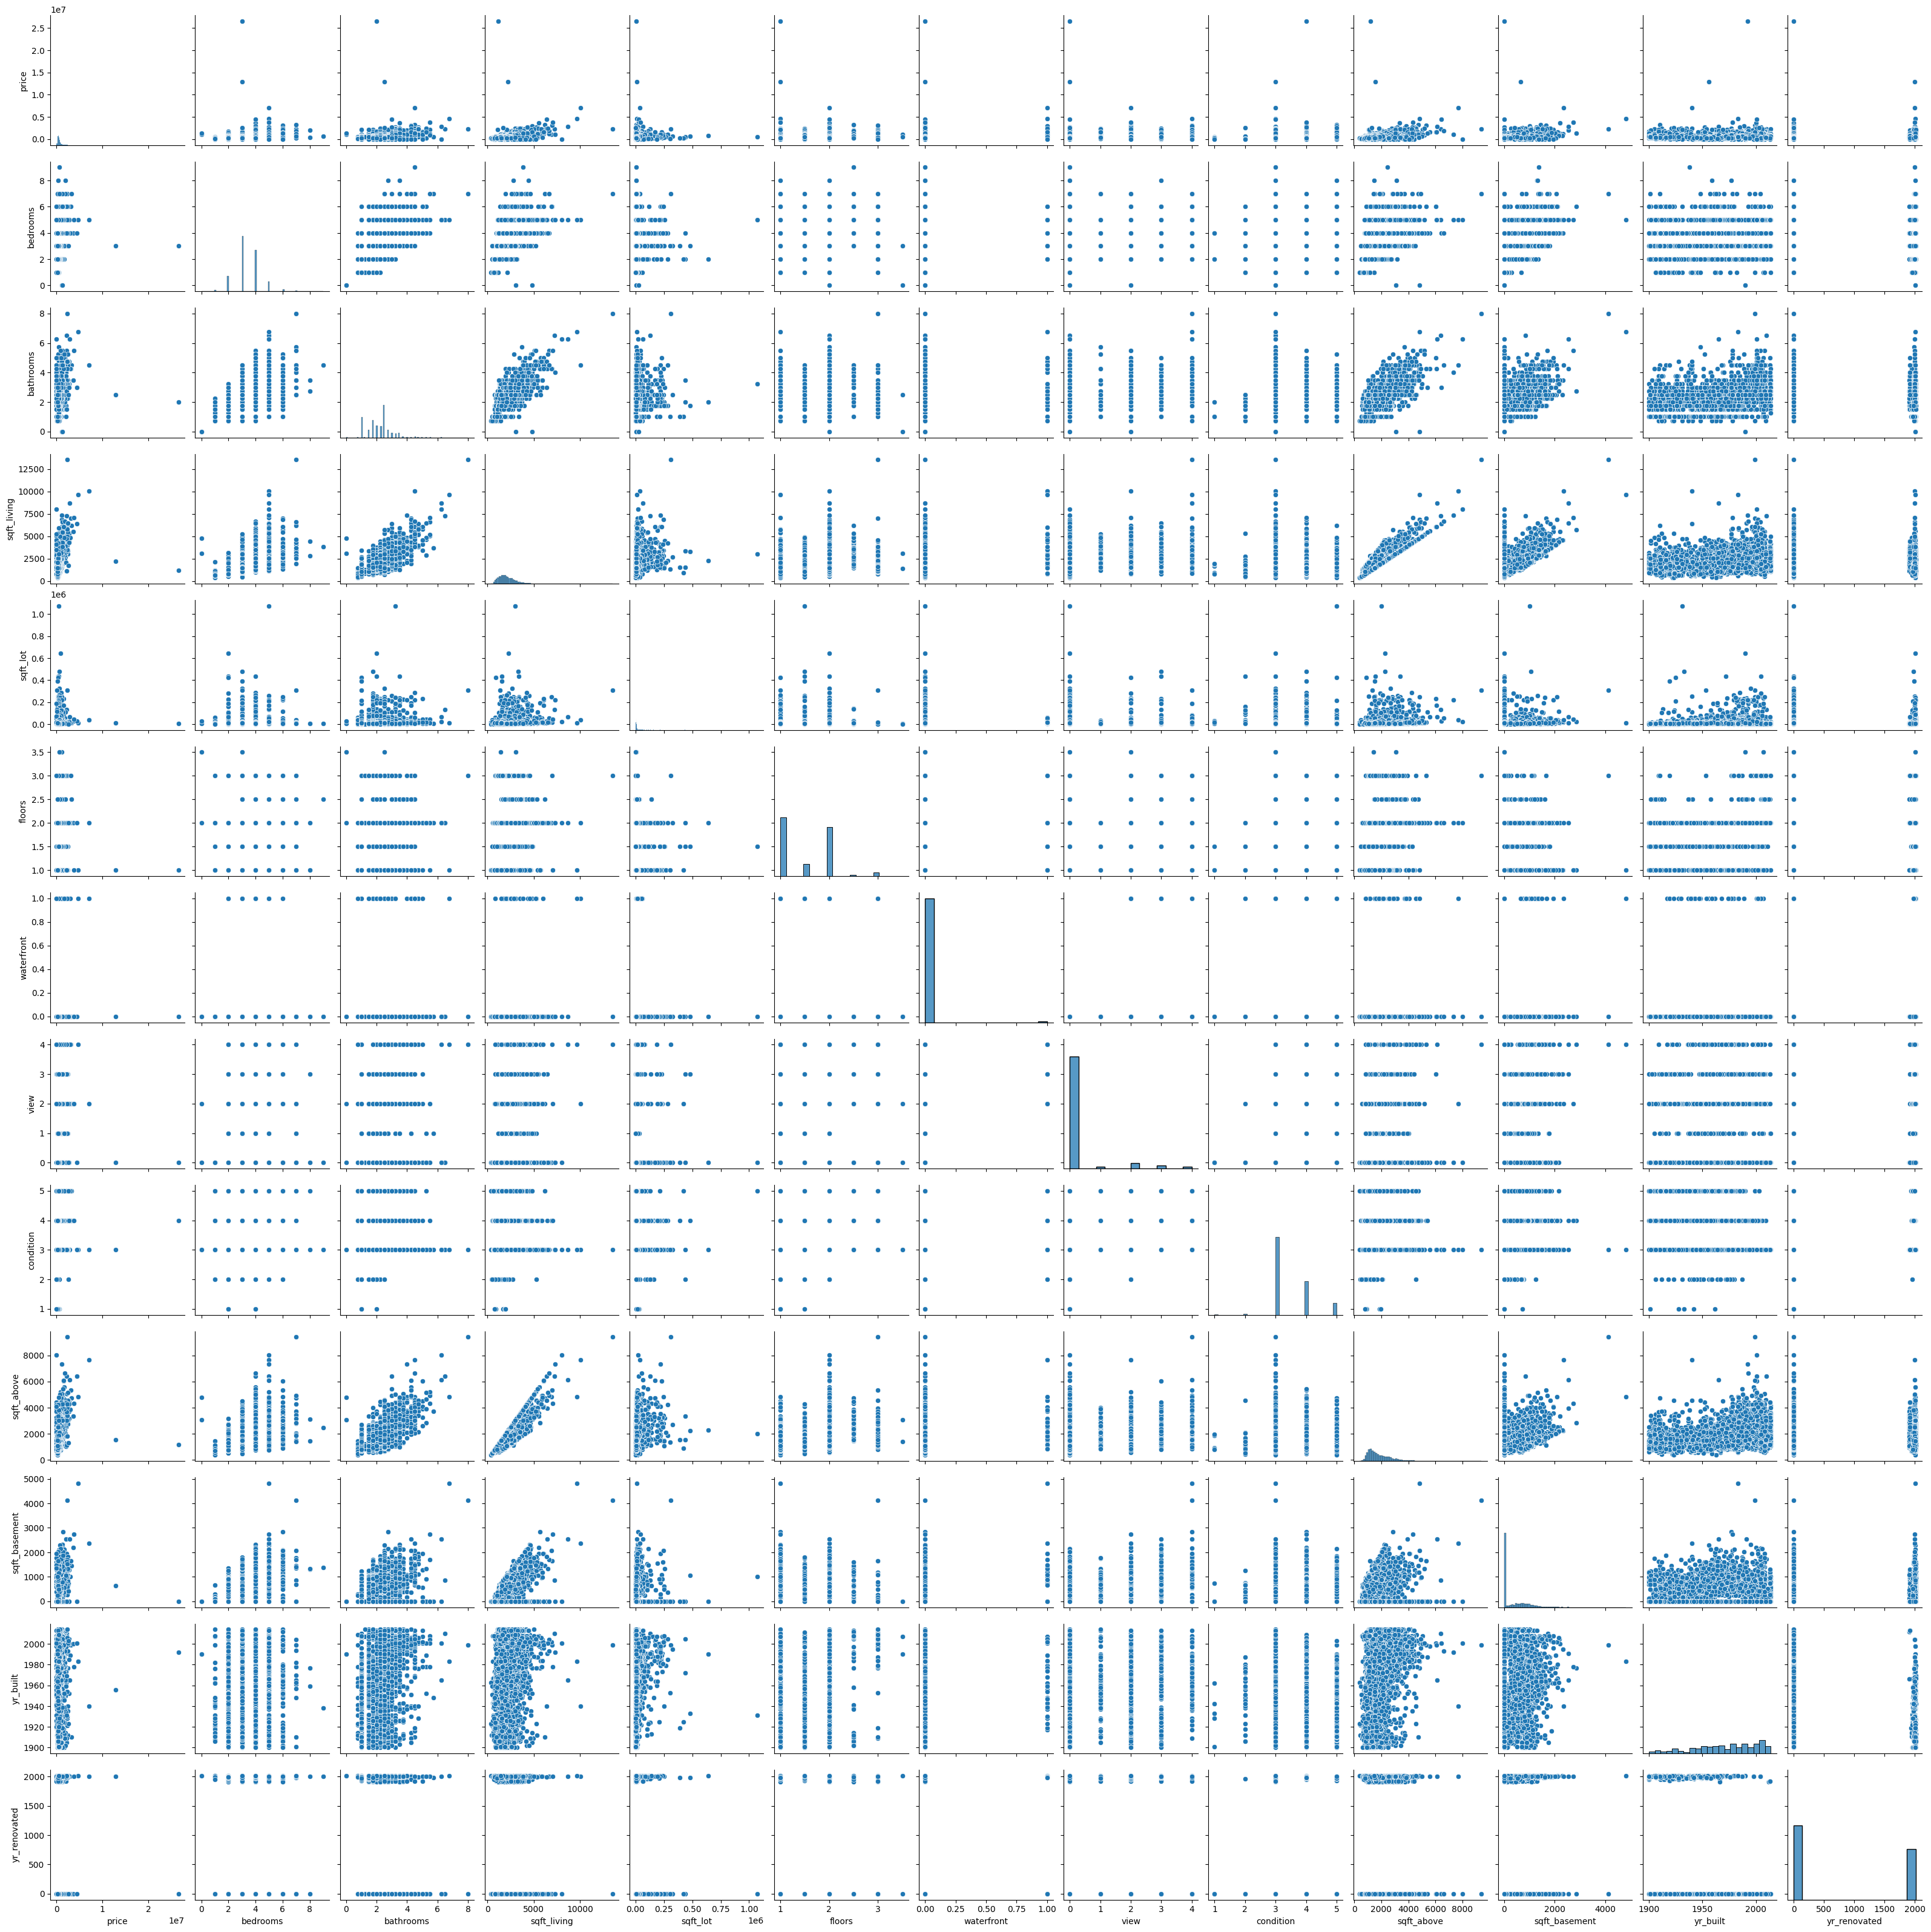

In [16]:
plt.figure(figsize=(25, 5))
sns.pairplot(house_data)
plt.show()

iii) Scatterplot

<Axes: xlabel='price', ylabel='floors'>

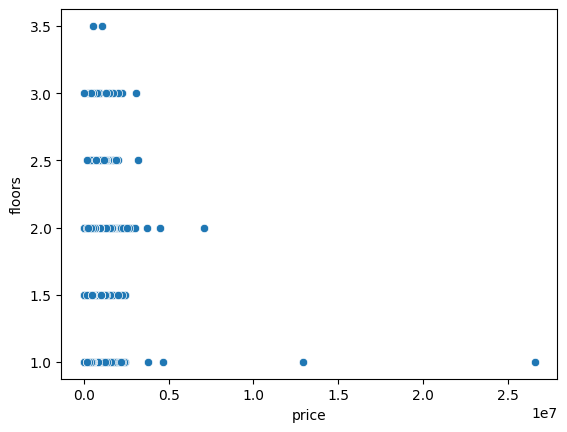

In [17]:
sns.scatterplot(x='price', y='floors', data=house_data)

C) Analysis of relationship

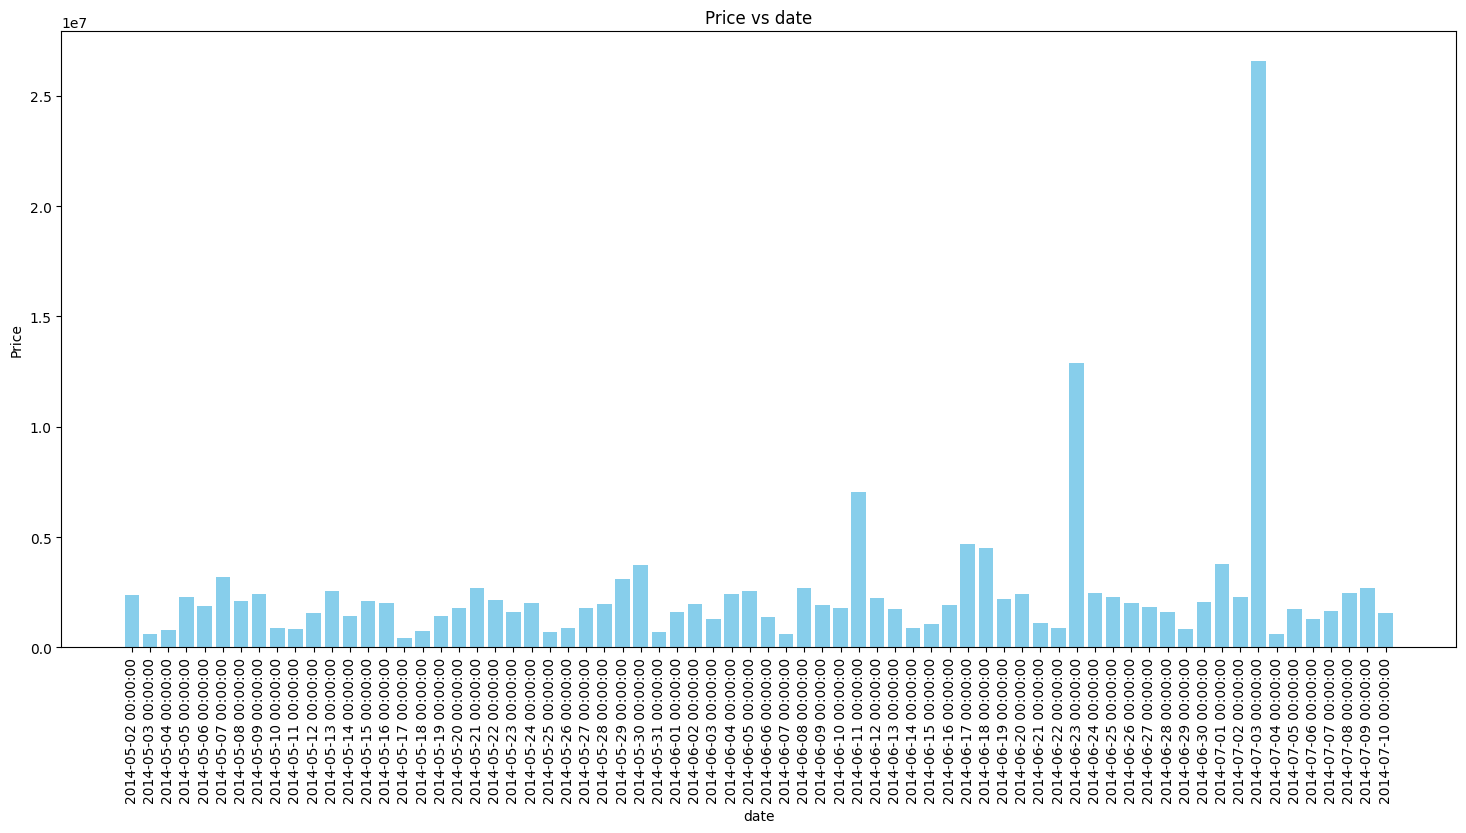

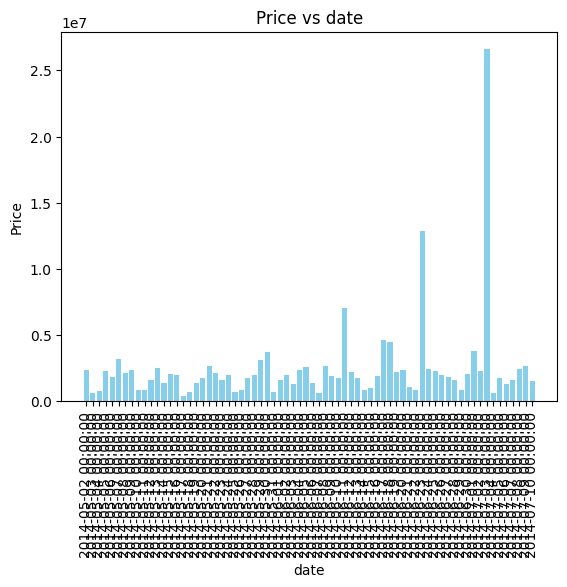

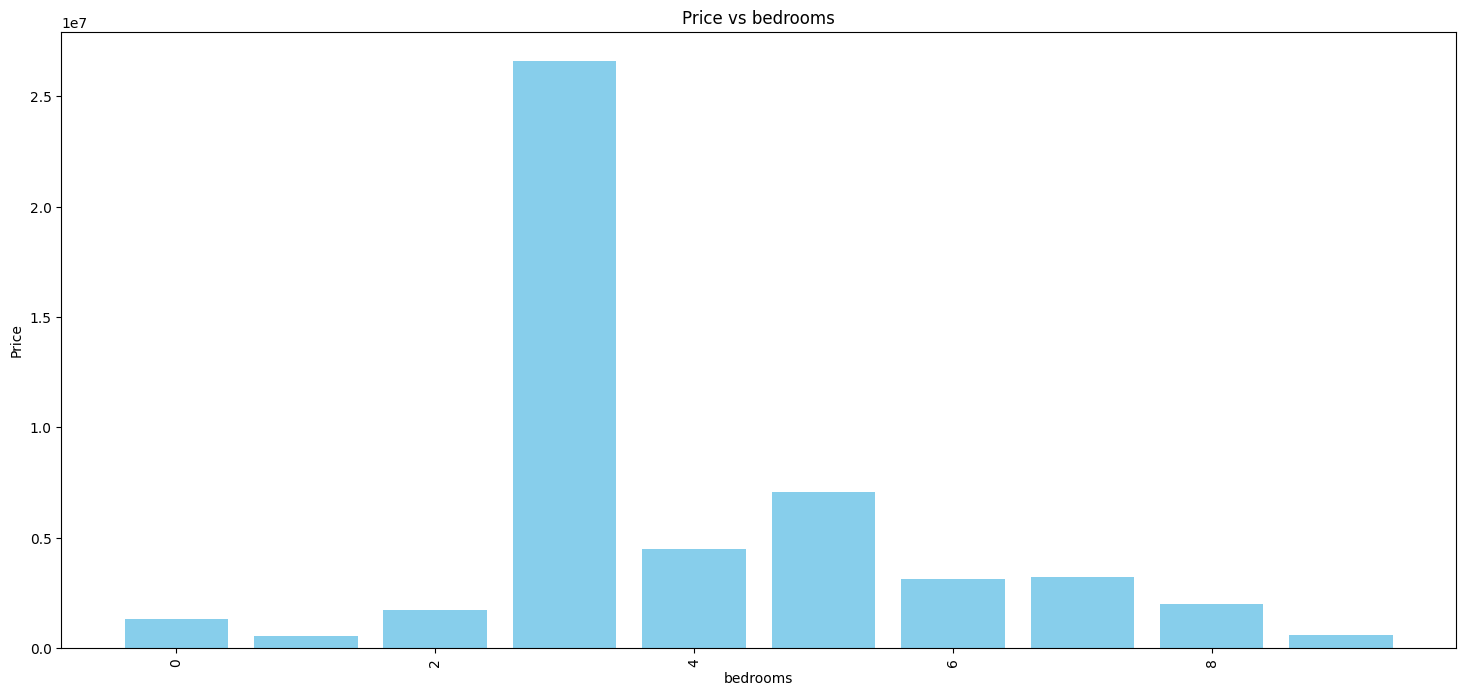

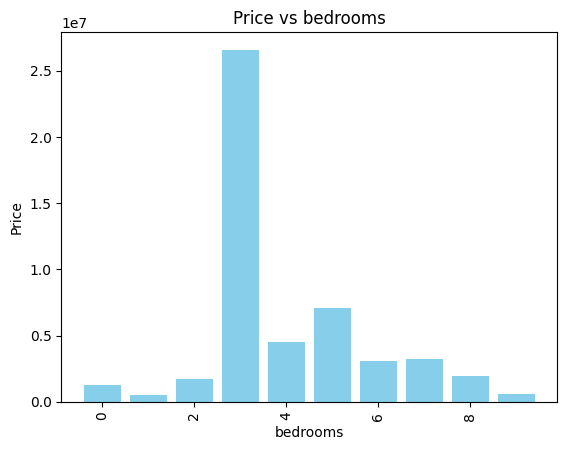

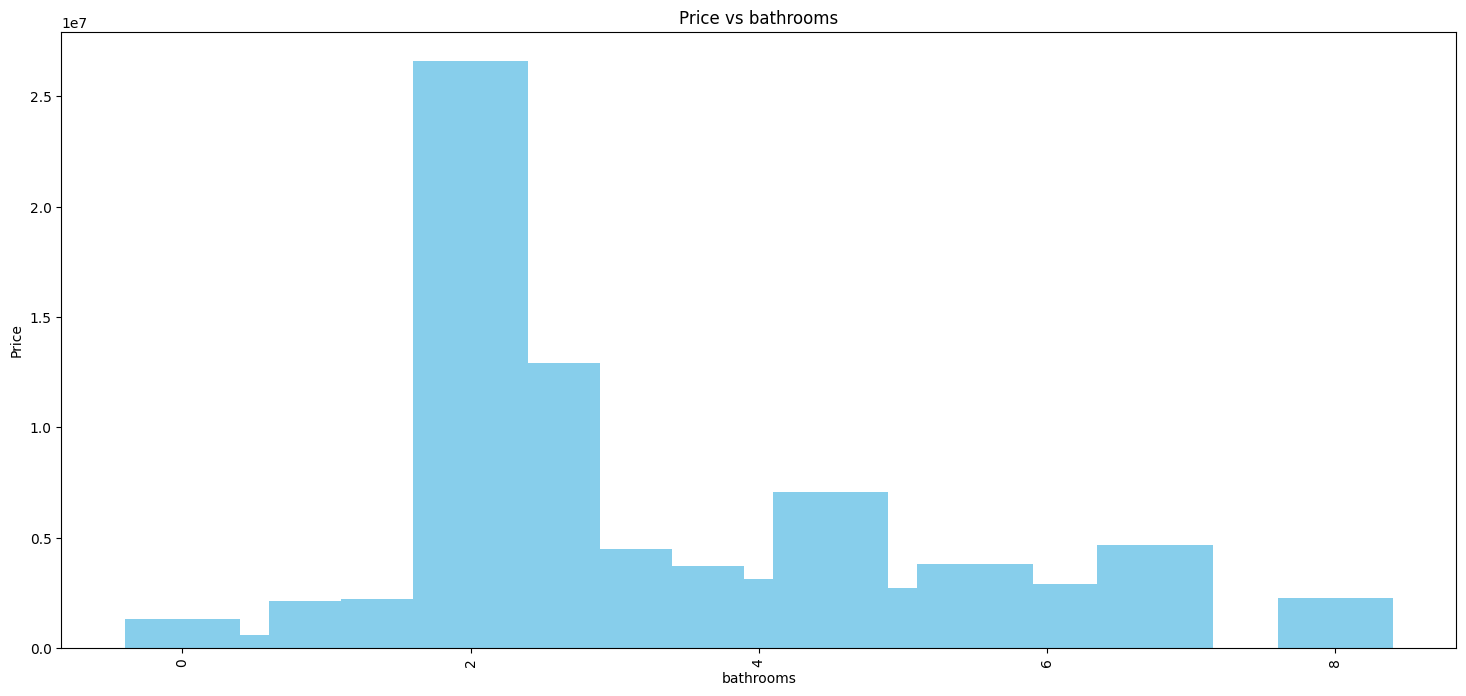

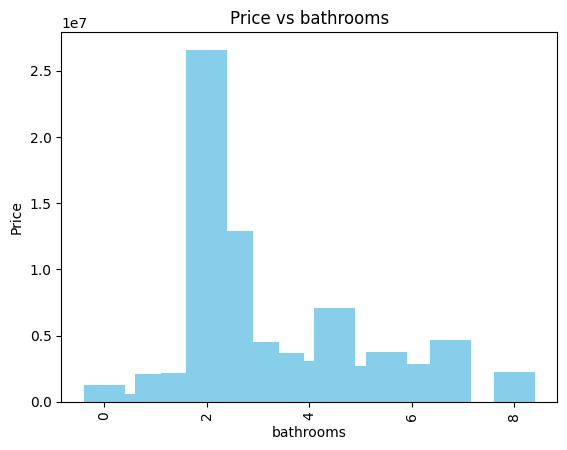

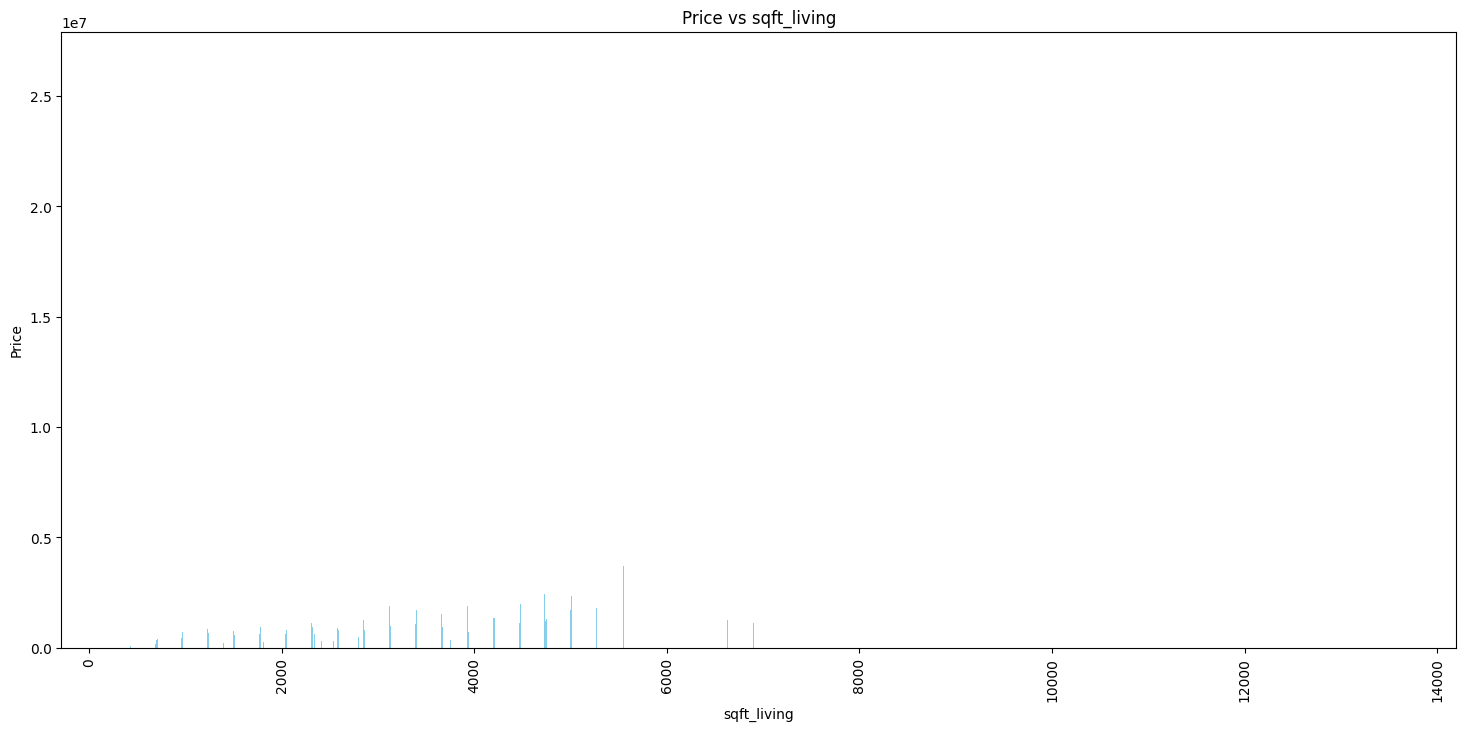

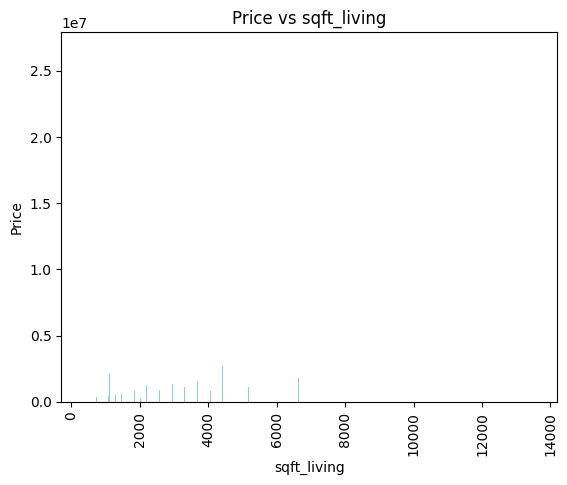

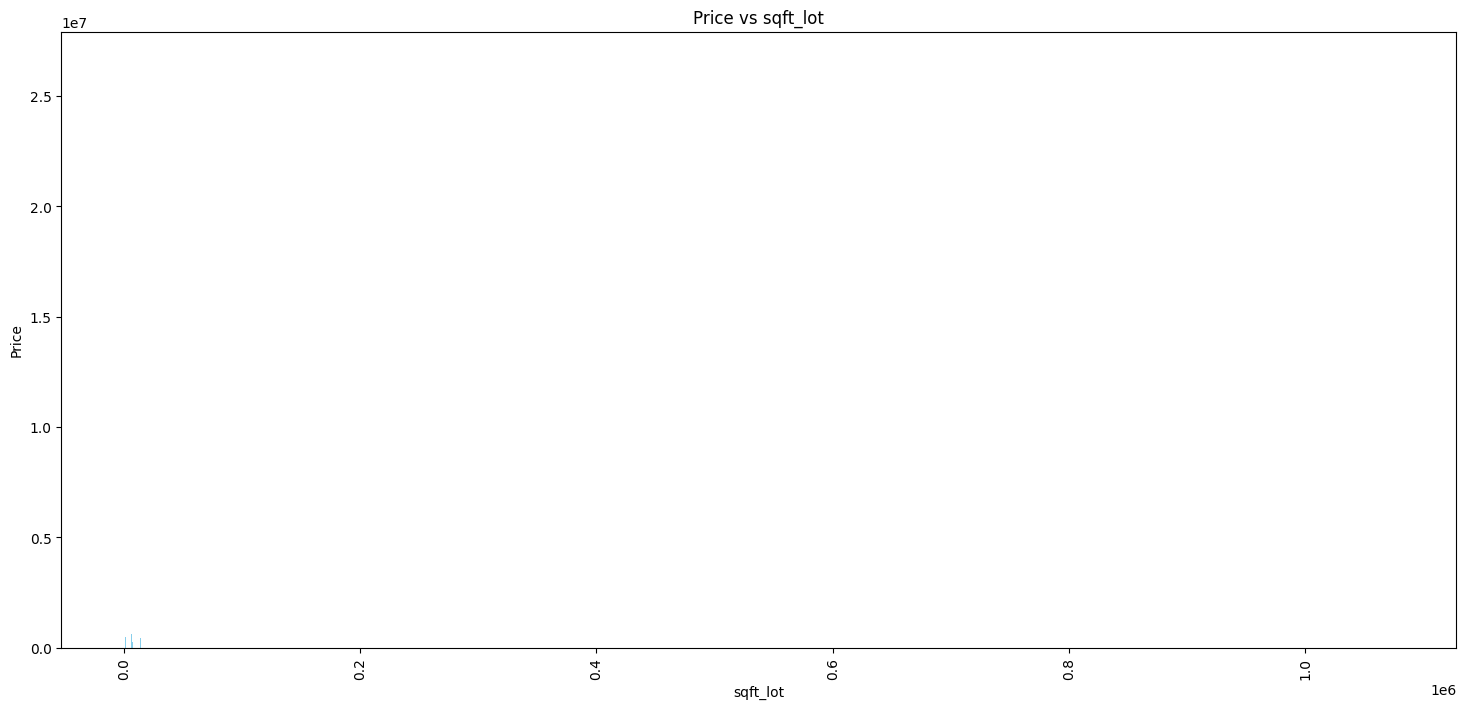

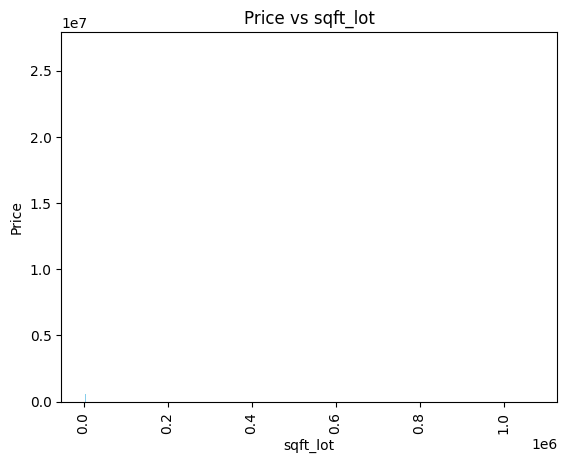

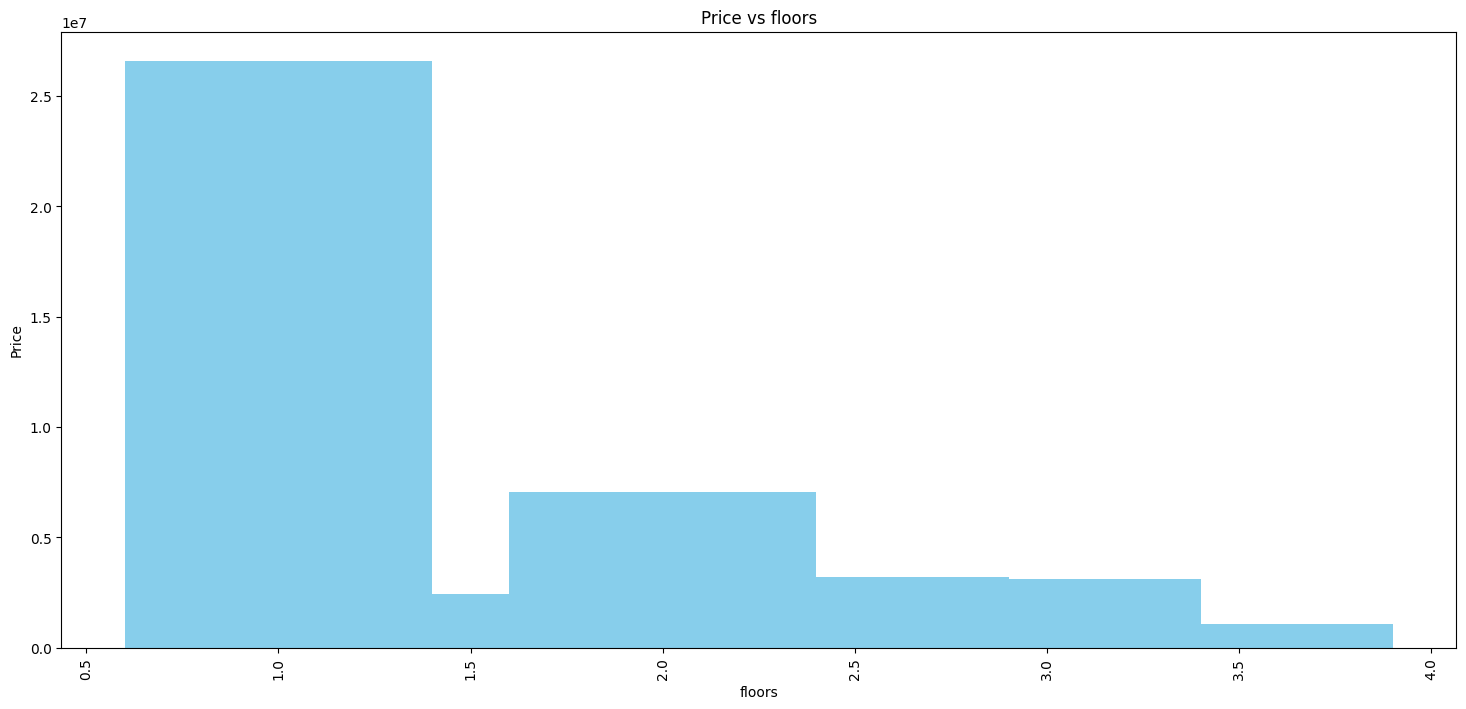

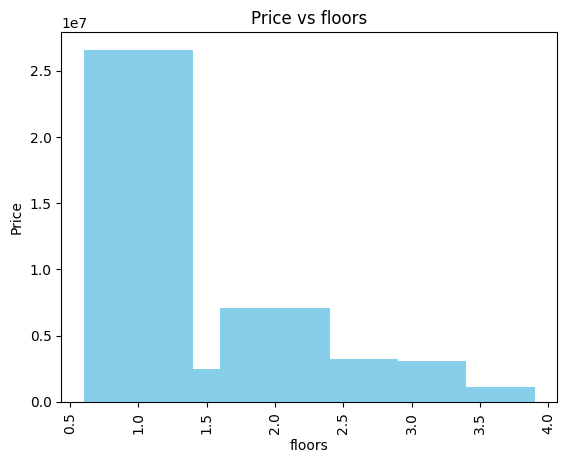

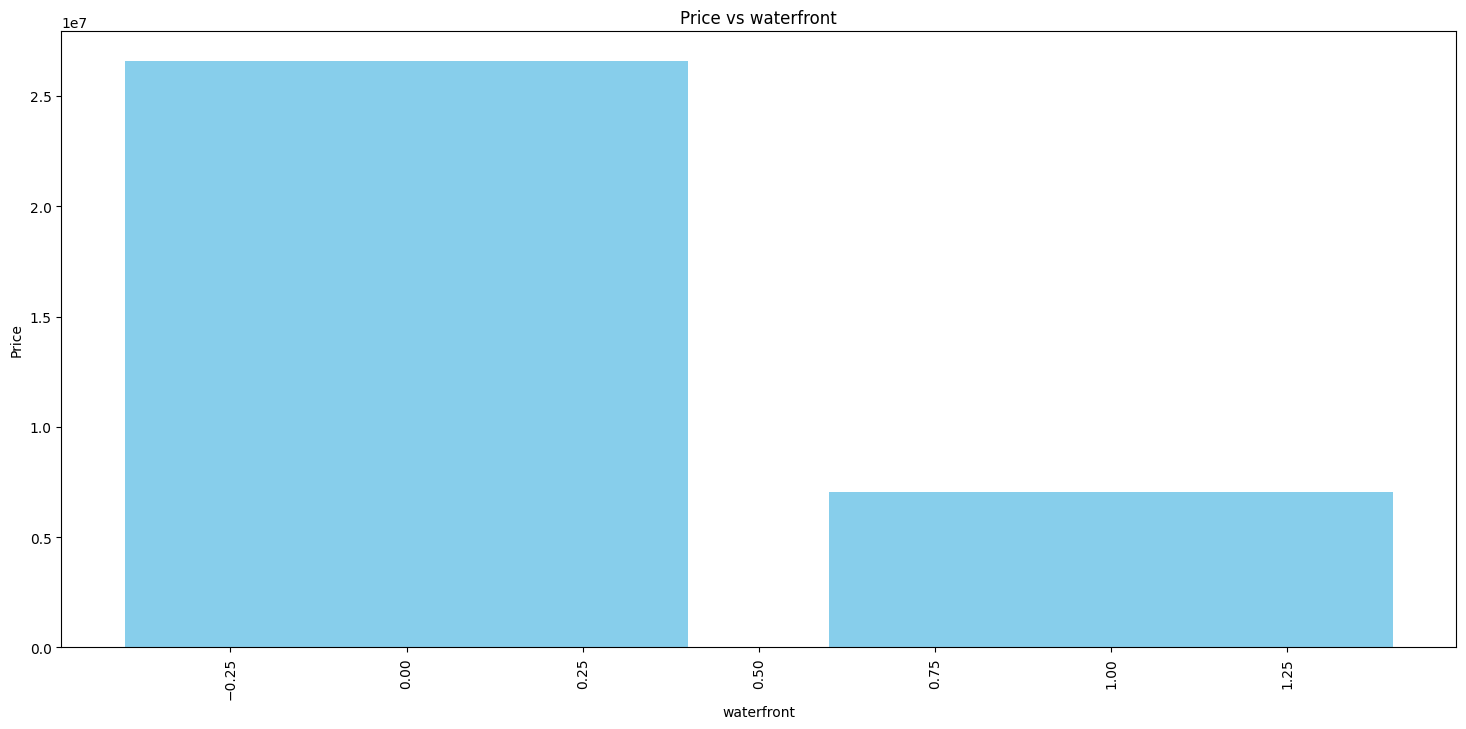

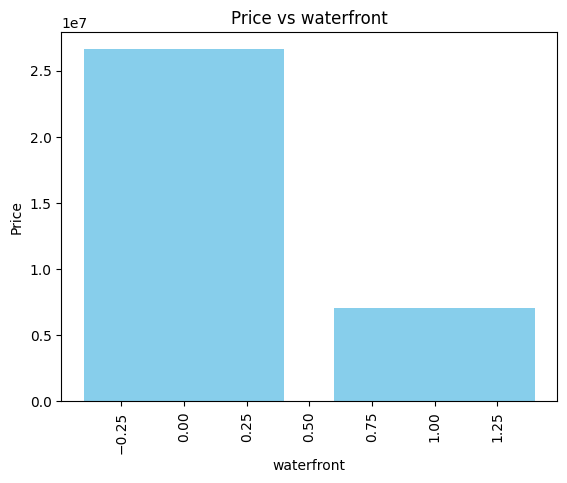

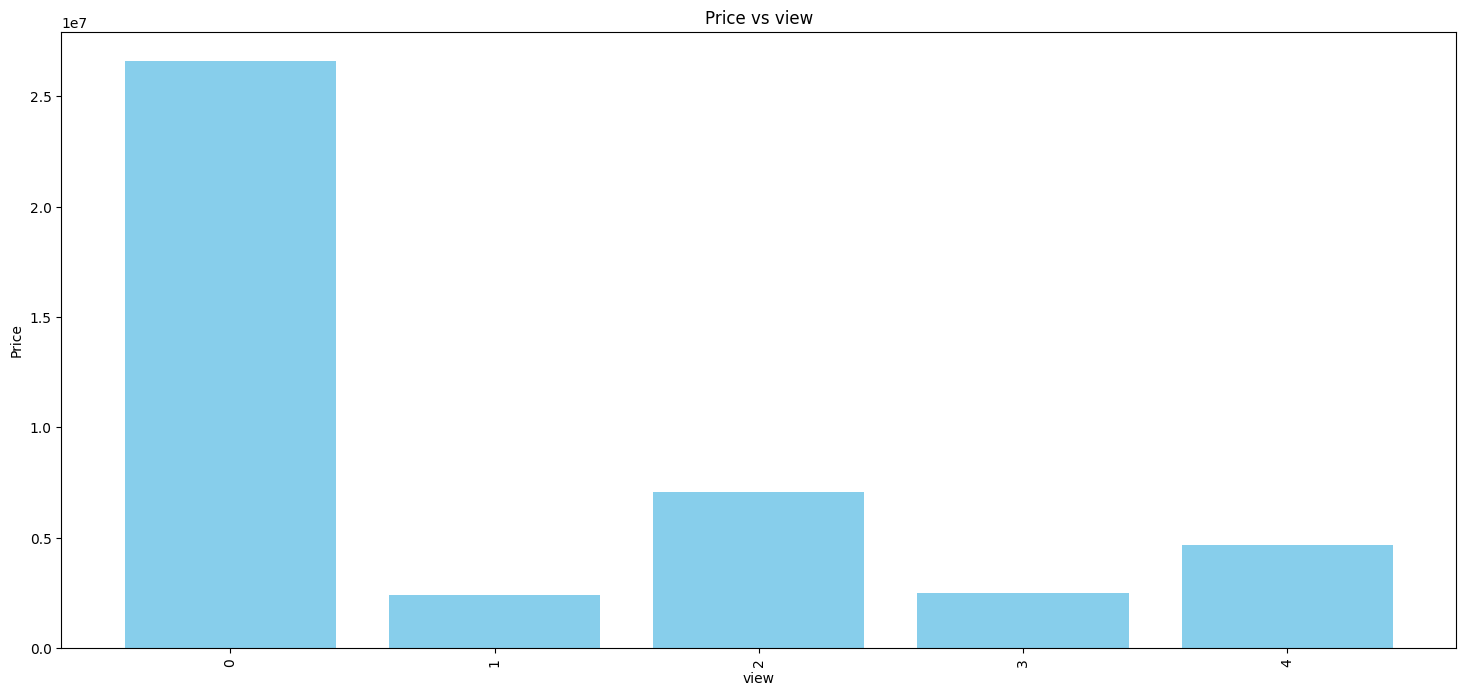

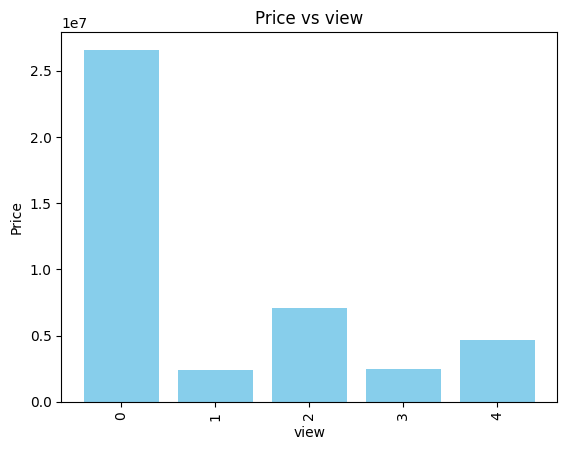

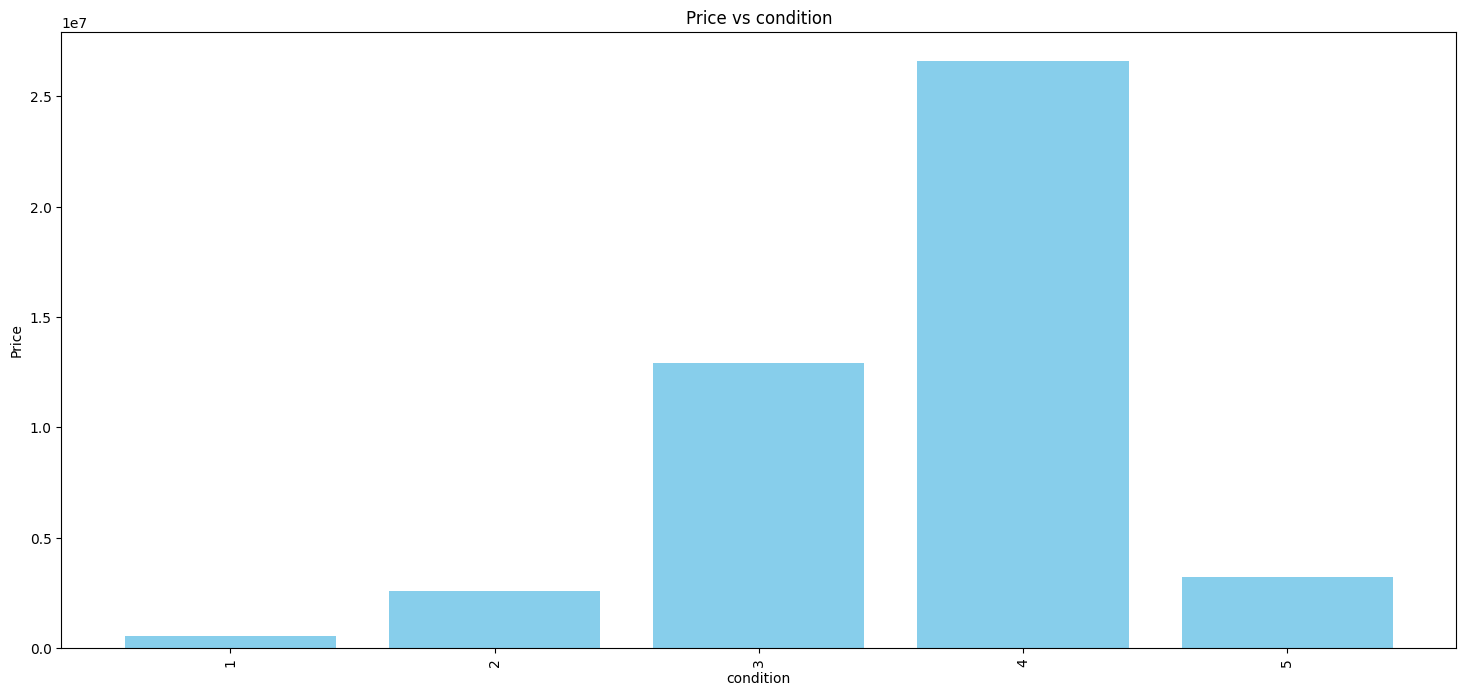

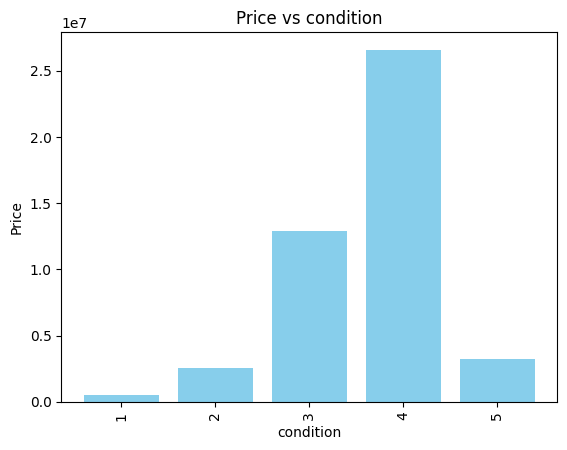

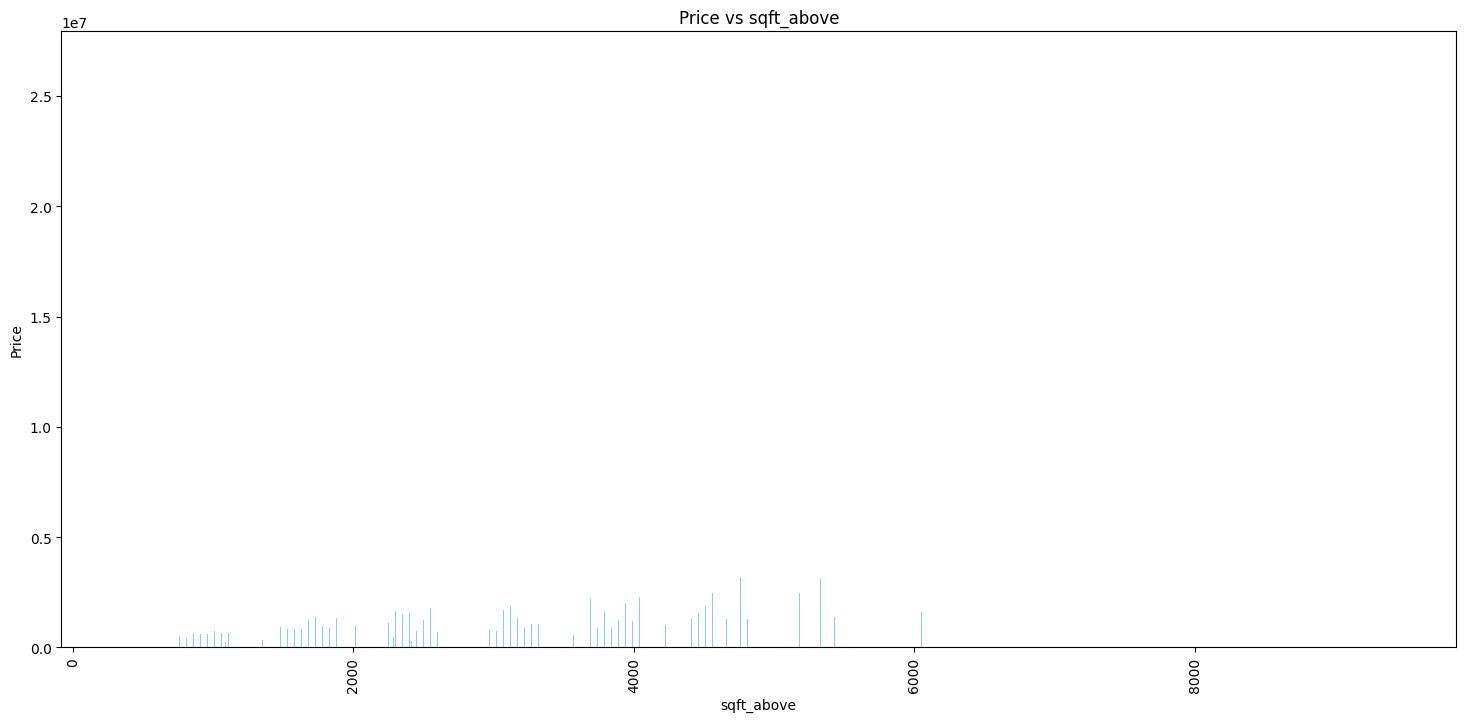

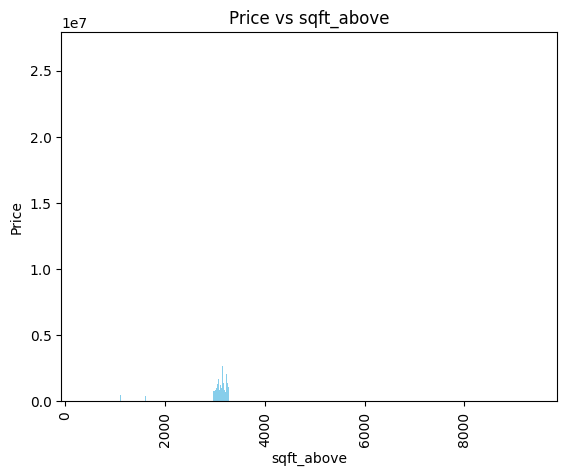

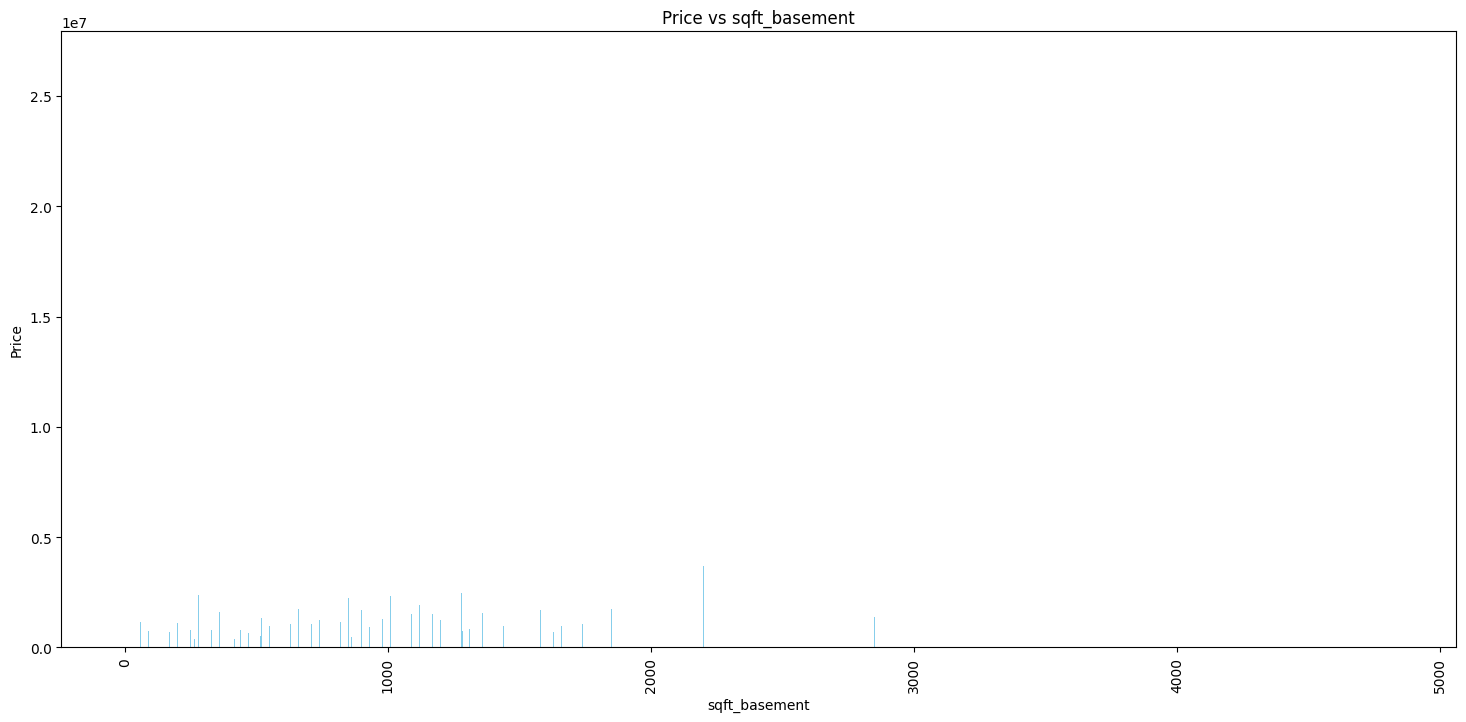

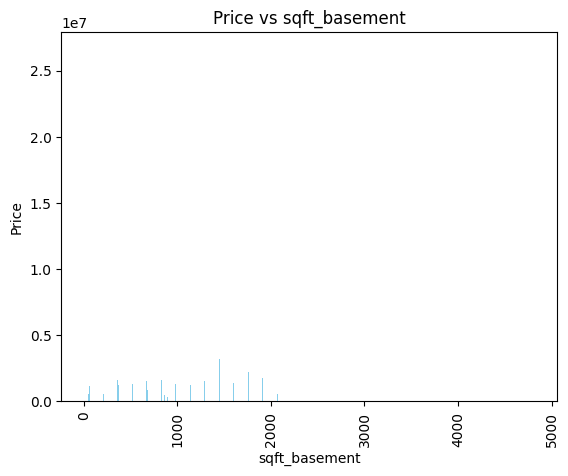

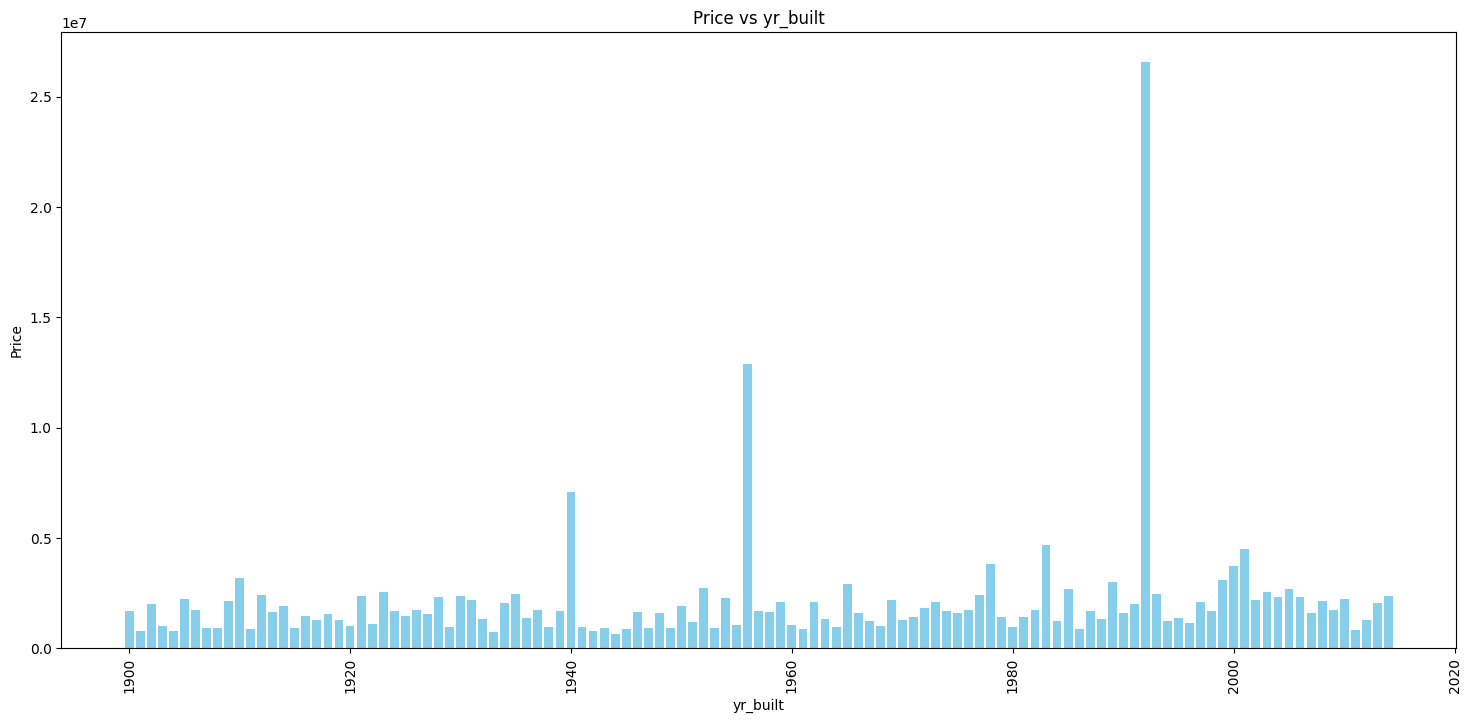

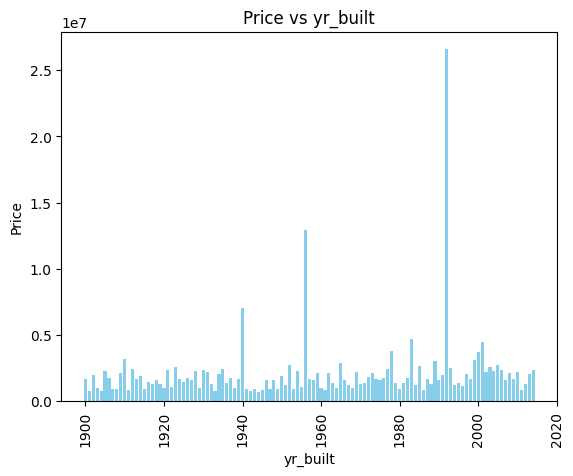

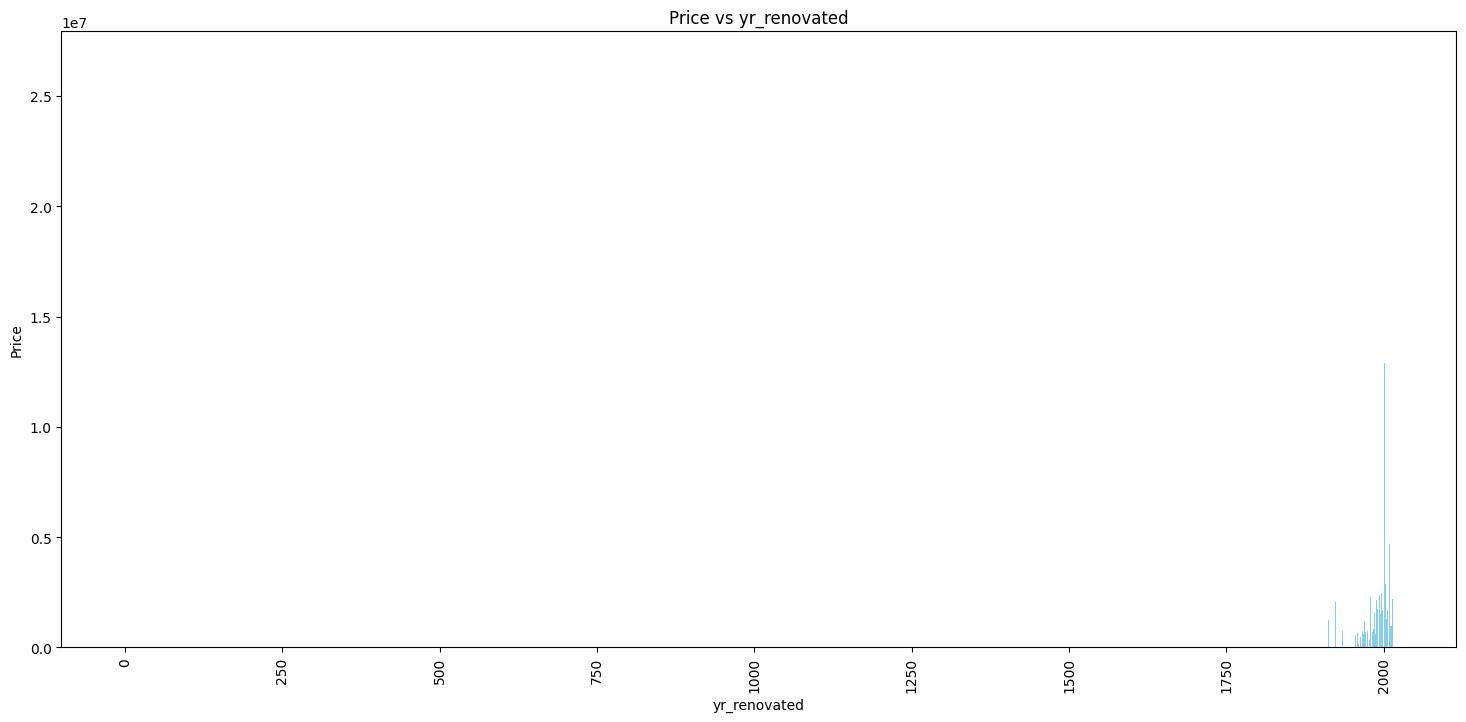

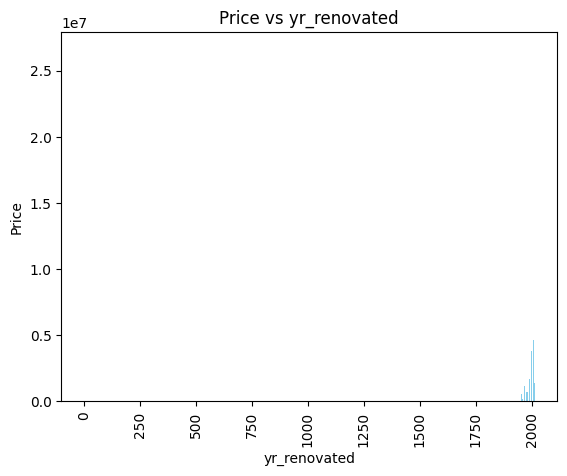

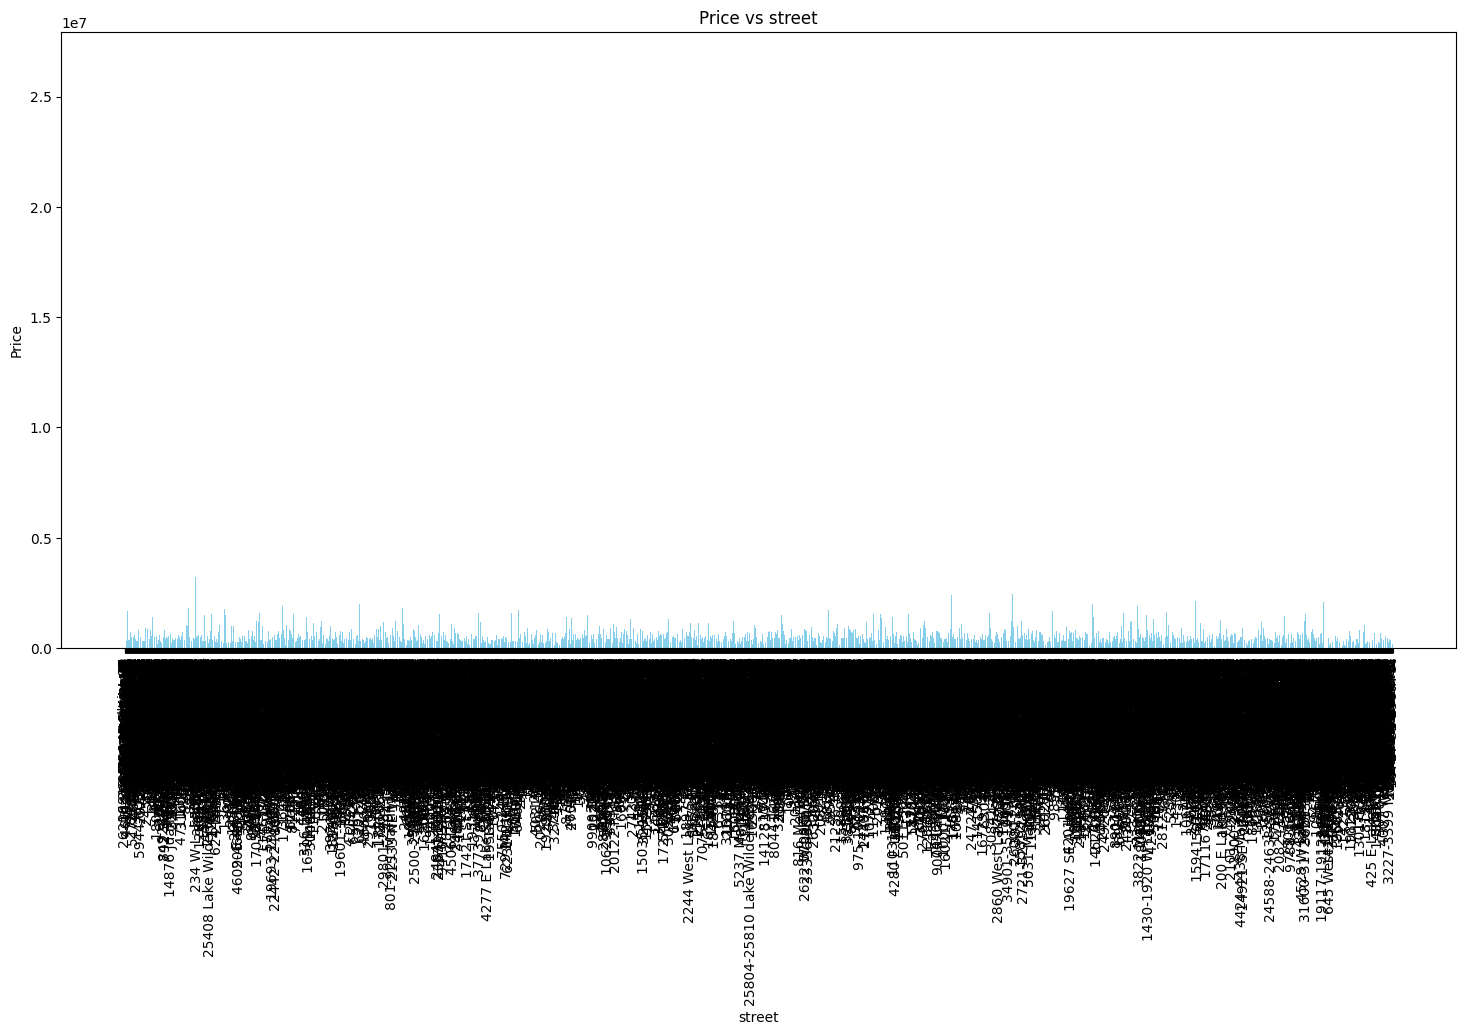

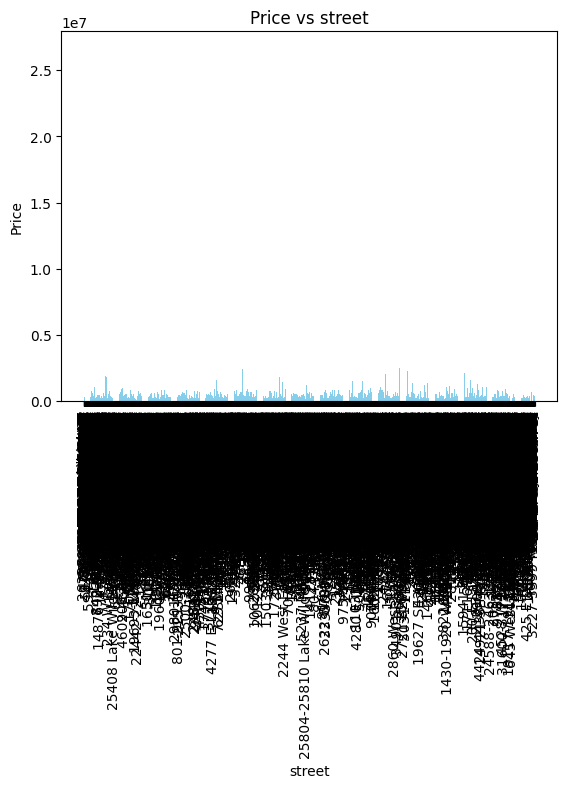

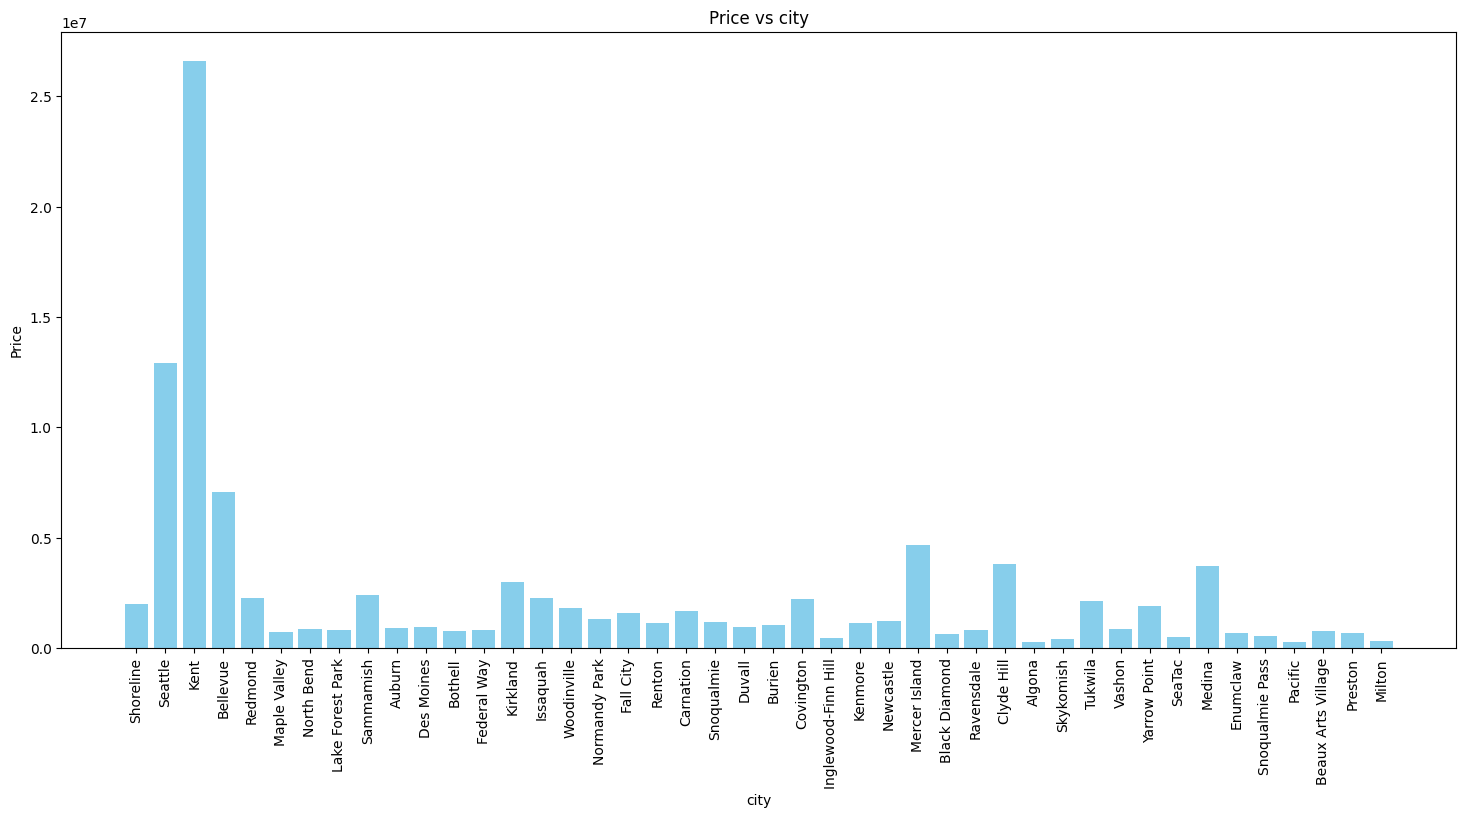

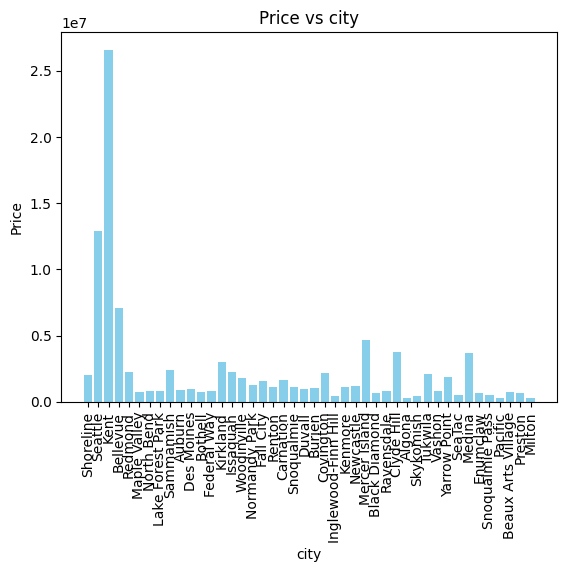

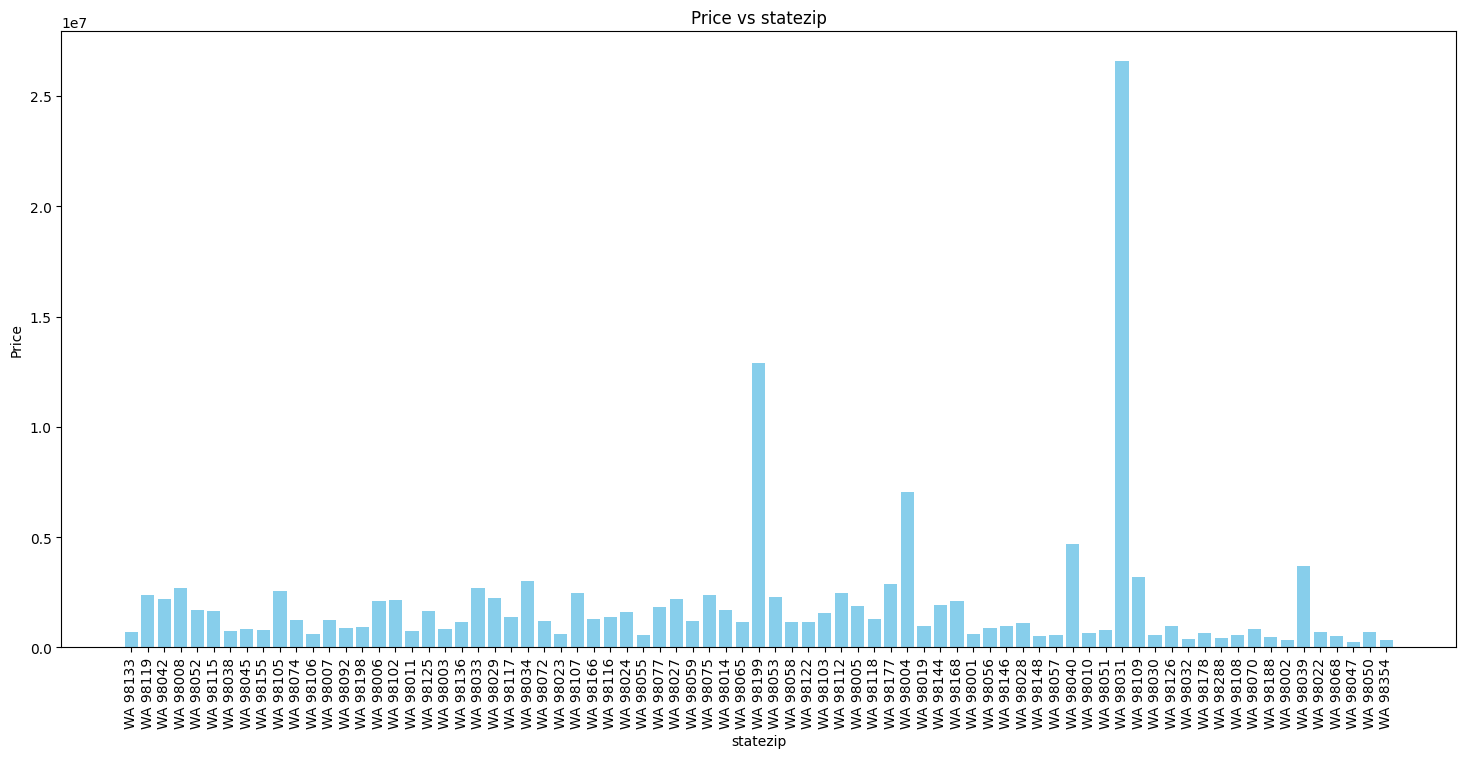

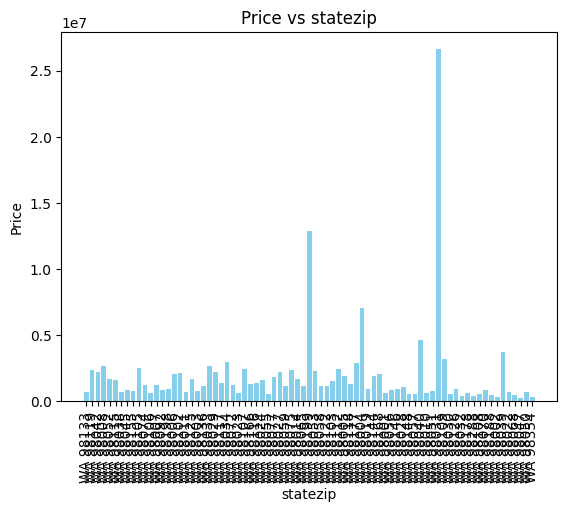

In [18]:
feature_names = house_data.drop(columns=['price','country']).columns.to_numpy()
for col in feature_names :
                                plt.figure(figsize=(18, 8))
                                plt.bar(house_data[col], house_data['price'], color='skyblue')
                                plt.xlabel(col)
                                plt.xticks(rotation=90)
                                plt.ylabel('Price')
                                plt.title(f'Price vs {col}')
                                plt.show()
                                plt.bar(house_data[col], house_data['price'], color='skyblue')
                                plt.xlabel(col)
                                plt.xticks(rotation=90)
                                plt.ylabel('Price')
                                plt.title(f'Price vs {col}')
                                plt.show()

4.Feature Engineering

i) Features based on EDA insights

In [19]:
if 'yr_built' in house_data.columns:
                       house_data['house_age'] = 2025 - house_data['yr_built']

ii) Split columns

In [20]:
if 'state' in house_data.columns:
    house_data.rename(columns={'state': 'State'}, inplace=True)
    house_data[['Country', 'City', 'State']] = house_data['State'].str.split(' , ', expand=True)
else:
    print("Column 'state' not found in the DataFrame.")

Column 'state' not found in the DataFrame.


iii) Polynomial Features

In [21]:
from sklearn.preprocessing import PolynomialFeatures
Pf=PolynomialFeatures(degree=2,interaction_only=False, include_bias=False)

iv) Dimensionality Reduction(PCA)

In [22]:
X['date'] = pd.to_datetime(X['date']).apply(lambda date: date.toordinal())
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
X_encoded.columns = encoder.get_feature_names_out(categorical_cols)
X = X.drop(columns=categorical_cols, axis=1)
X = pd.concat([X, X_encoded], axis=1)
X.columns = X.columns.astype(str)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

5.Model Building

a) Machine Training Models

i) Linear Regression

In [29]:
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
X_encoded.columns = encoder.get_feature_names_out(categorical_cols)
X = X.drop(columns=categorical_cols, axis=1)
X = pd.concat([X, X_encoded], axis=1)
X.columns = X.columns.astype(str)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

ii) Random Forest Regressor

In [30]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

RandomForestRegressor()

iii) Train model using MAE,RMSE,R^2

In [25]:
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
X_encoded.columns = encoder.get_feature_names_out(categorical_cols)
X = X.drop(columns=categorical_cols, axis=1)
X = pd.concat([X, X_encoded], axis=1)
X.columns = X.columns.astype(str)
X['date'] = pd.to_datetime(X['date']).apply(lambda date: date.toordinal())
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

MAE: 156833.64838718384
RMSE: 985875.6779469642
R² Score: 0.046963435408793774


9.Visualization of Results and Model Insights

a) Model Behaviour

i) Residual Plots

Saving data.csv to data (1).csv


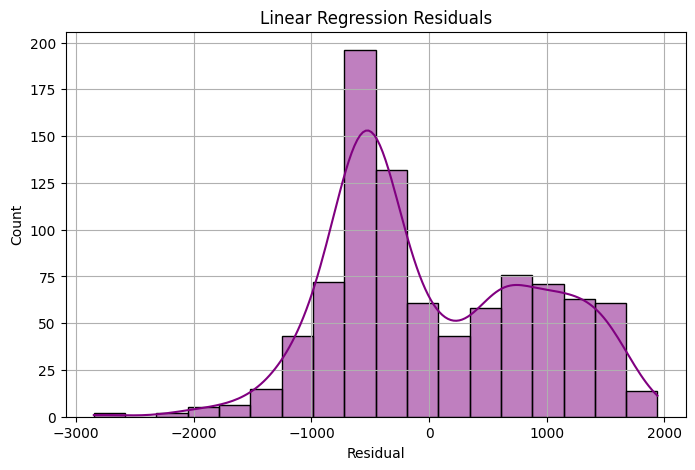

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])
df = df.select_dtypes(include=[np.number])
df.dropna(inplace=True)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 5))
    sns.histplot(residuals, kde=True, color='purple')
    plt.title(f"{model_name} Residuals")
    plt.xlabel("Residual")
    plt.grid(True)
    plt.show()
plot_residuals(y_test, y_pred, "Linear Regression")

ii) Feature Importantance Plot

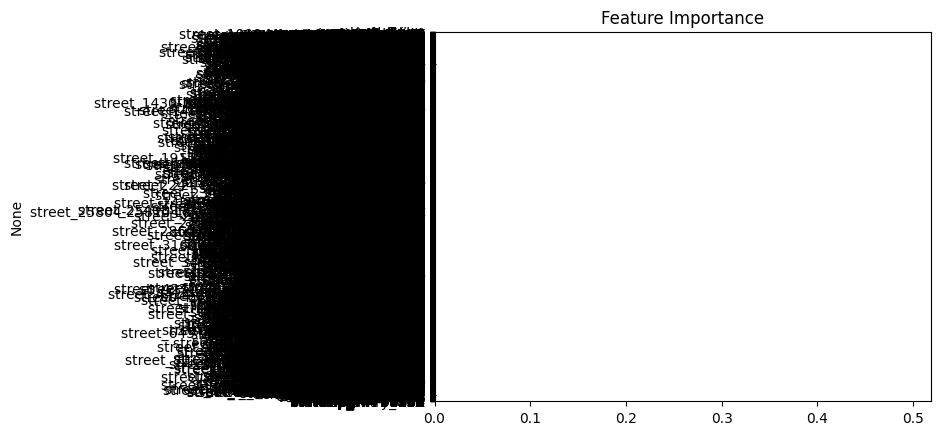

In [27]:
importances = reg.feature_importances_
features = X_train.columns
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()

iii) Visual comparision of Model Performance

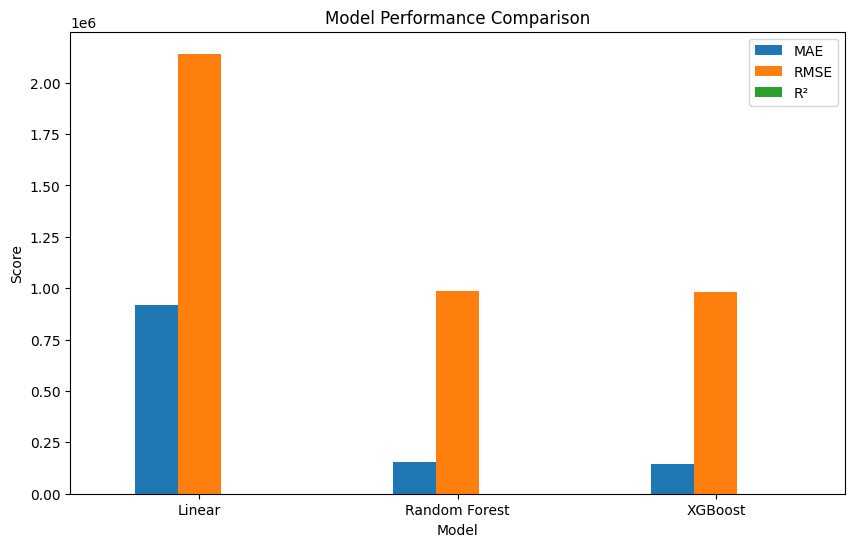

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)
results = pd.DataFrame({
    'Model': ['Linear', 'Random Forest', 'XGBoost'],
    'MAE': [mae_lr, mae_rf, mae_xgb],
    'RMSE': [rmse_lr, rmse_rf, rmse_xgb],
    'R²': [r2_lr, r2_rf, r2_xgb]
})
results.plot(x='Model', kind='bar', figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()